In [90]:
import pandas as pd 

start_num = 1 
end_num = 100

pvalue_list = []
pvalue_dir = './results/b0_g0.0/gene_permutation/'
for i in range(start_num, end_num + 1):
    pvalue_file = f'{pvalue_dir}sim_{i}_pvalues.csv'
    try:
        pvalue_df = pd.read_csv(pvalue_file, index_col=0)
        pvalue_list.append(pvalue_df)
    except FileNotFoundError:
        print(f"File {pvalue_file} not found. Skipping.")


true_pathways = ['R-HSA-2173791_L1', 'R-HSA-170834_L2', 'R-HSA-9006936_L3']

pvalue_df = pd.concat(pvalue_list, axis=0)
power_df = pvalue_df[pvalue_df.index.isin(true_pathways)]
# calculate power 
power_df = power_df.groupby('pathway').apply(lambda x: (x['p_value'] < 0.05).mean()).reset_index()
power_df.columns = ['pathway', 'power']


import pandas as pd 

start_num = 1 
end_num = 100

pvalue_list = []
pvalue_dir = './results/b4_g4/gene_permutation/'
for i in range(start_num, end_num + 1):
    pvalue_file = f'{pvalue_dir}sim_{i}_pvalues.csv'
    try:
        pvalue_df = pd.read_csv(pvalue_file, index_col=0)
        pvalue_list.append(pvalue_df)
    except FileNotFoundError:
        print(f"File {pvalue_file} not found. Skipping.")


true_pathways = ['R-HSA-2173791_L1', 'R-HSA-170834_L2', 'R-HSA-9006936_L3']

pvalue_df = pd.concat(pvalue_list, axis=0)
power_df = pvalue_df[pvalue_df.index.isin(true_pathways)]
# calculate power 
power_df = power_df.groupby('pathway').apply(lambda x: (x['p_value'] < 0.05).mean()).reset_index()
power_df.columns = ['pathway', 'power']

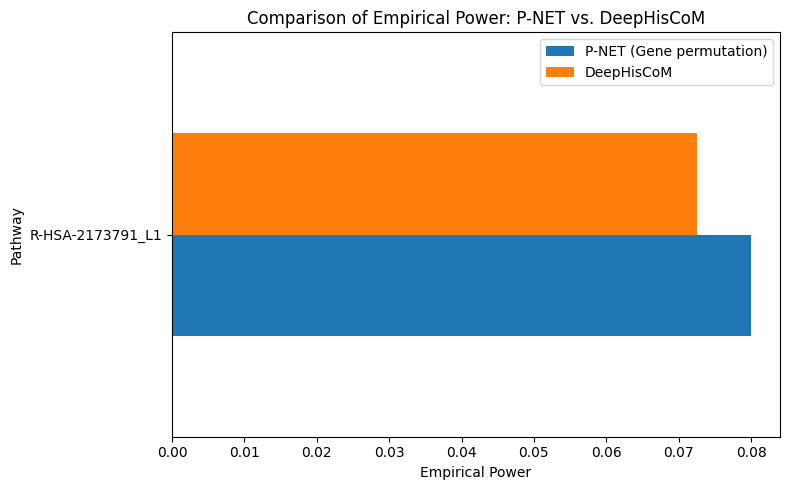

In [91]:

# pathway 기준으로 병합
merged_df = pd.merge(
    power_df_pnet,
    power_df_deep,
    on='pathway',
    how='inner'
)

# 병합된 DataFrame을 index 설정
merged_df.set_index('pathway', inplace=True)

# 가로 바 차트 생성
ax = merged_df.plot(kind='barh', figsize=(8, 5))
ax.set_xlabel('Empirical Power')
ax.set_ylabel('Pathway')
ax.set_title('Comparison of Empirical Power: P-NET vs. DeepHisCoM')
plt.tight_layout()
plt.show()


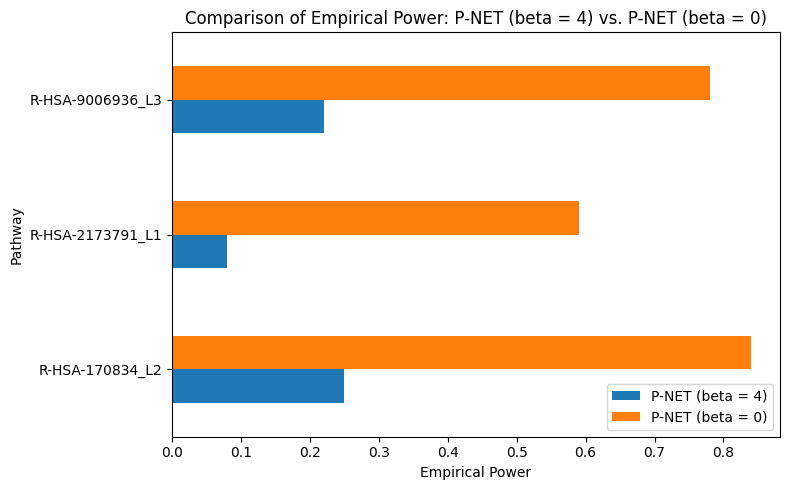

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# =============================================================================
# 1. P-NET (Gene permutation) 결과 읽기 및 empirical power 계산
# =============================================================================

start_num = 1
end_num = 100
pvalue_list_pnet = []
pvalue_dir_pnet = './results/b0_g0.0/gene_permutation/'

for i in range(start_num, end_num + 1):
    pvalue_file = f'{pvalue_dir_pnet}sim_{i}_pvalues.csv'
    try:
        pvalue_df = pd.read_csv(pvalue_file, index_col=0)
        pvalue_list_pnet.append(pvalue_df)
    except FileNotFoundError:
        print(f"File {pvalue_file} not found. Skipping.")

# 관심 있는 실제 경로 목록 (P-NET에서는 _L# suffix 포함)
true_pathways_pnet = ['R-HSA-2173791_L1', 'R-HSA-170834_L2', 'R-HSA-9006936_L3']

# 여러 시뮬레이션 결과 병합
pvalue_all_pnet = pd.concat(pvalue_list_pnet, axis=0)

# true_pathways에 해당하는 행만 추출하고, empirical power 계산
power_df_pnet = (
    pvalue_all_pnet
    .loc[pvalue_all_pnet.index.isin(true_pathways_pnet)]
    .groupby(level=0)
    .apply(lambda x: (x['p_value'] < 0.05).mean())
    .reset_index()
)
power_df_pnet.columns = ['pathway', 'power']
power_df_pnet = power_df_pnet.rename(columns={'power': 'P-NET (beta = 4)'})

# =============================================================================
# 2. DeepHisCoM 결과 읽기 및 empirical power 계산
# =============================================================================

pvalue_list_deep = []
pvalue_dir_deep = './results/b4_g4/gene_permutation/'

for i in range(start_num, end_num + 1):
    pvalue_file = f'{pvalue_dir_deep}sim_{i}_pvalues.csv'
    try:
        pvalue_df = pd.read_csv(pvalue_file, index_col=0)
        pvalue_list_deep.append(pvalue_df)
    except FileNotFoundError:
        print(f"File {pvalue_file} not found. Skipping.")

# 실제 pathway 목록 (DeepHisCoM에서는 suffix 없이)
true_pathways_deep = ['R-HSA-2173791_L1', 'R-HSA-170834_L2', 'R-HSA-9006936_L3']

# 여러 시뮬레이션 결과 병합
pvalue_all_deep = pd.concat(pvalue_list_deep, axis=0)

# true_pathways에 해당하는 행만 추출하고 empirical power 계산
power_df_deep = (
    pvalue_all_deep
    .loc[pvalue_all_deep.index.isin(true_pathways_deep)]
    .groupby(level=0)
    .apply(lambda x: (x['p_value'] < 0.05).mean())
    .reset_index()
)
power_df_deep.columns = ['pathway', 'power']

# =============================================================================
# 3. DeepHisCoM pathway 이름에 P-NET suffix 매핑
# =============================================================================

# P-NET에서는 레벨 정보가 포함된 형태이므로, DeepHisCoM 결과를 동일하게 매핑
suffix_map = {
    'R-HSA-2173791_L1': 'R-HSA-2173791_L1',
    'R-HSA-170834_L2':  'R-HSA-170834_L2',
    'R-HSA-9006936_L3': 'R-HSA-9006936_L3'
}


# DeepHisCoM 경로 이름을 P-NET과 일치하도록 변환
power_df_deep['pathway'] = power_df_deep['pathway'].map(suffix_map)
power_df_deep = power_df_deep.rename(columns={'power': 'P-NET (beta = 0)'})
power_df_pnet = power_df_pnet.rename(columns={'power': 'P-NET (beta = 4)'})

# =============================================================================
# 4. 두 결과 병합 및 시각화
# =============================================================================

# pathway 기준으로 병합
merged_df = pd.merge(
    power_df_pnet,
    power_df_deep,
    on='pathway',
    how='inner'
)

# 병합된 DataFrame을 index 설정
merged_df.set_index('pathway', inplace=True)

# 가로 바 차트 생성
ax = merged_df.plot(kind='barh', figsize=(8, 5))
ax.set_xlabel('Empirical Power')
ax.set_ylabel('Pathway')
ax.set_title('Comparison of Empirical Power: P-NET (beta = 4) vs. P-NET (beta = 0)')
plt.tight_layout()
plt.show()



In [60]:
import pandas as pd 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ───────────────────────────────────────────────
# 1. 데이터 병합 (이전과 동일)
# ───────────────────────────────────────────────
start_num, end_num = 1, 100
pnet_dir  = './results/b4_g4/gene_permutation/'
deep_dir  = './results/b4_g4/label_permutation/'
true_signal = 'R-HSA-2173791'

records = []
for sim in range(start_num, end_num + 1):
    try:
        pnet = pd.read_csv(f'{pnet_dir}sim_{sim}_pvalues.csv', index_col=0)
        pnet = pnet[pnet.index.str.endswith('_L1')]
        pnet.index = pnet.index.str.replace('_L1$', '', regex=True)

        deep = pd.read_csv(f'{deep_dir}sim_{sim}_pvalues_DeepHisCoM.csv',
                           index_col=0)

        common = pnet.index.intersection(deep.index)
        records.append(pd.DataFrame({
            'sim':     sim,
            'pathway': common,
            'pnet_p':  pnet.loc[common, 'p_value'].values,
            'deep_p':  deep.loc[common, 'p_value'].values
        }))
    except FileNotFoundError:
        continue

df_all   = pd.concat(records, ignore_index=True)
is_true  = df_all['pathway'] == true_signal

# ───────────────────────────────────────────────
# 2. mean-FDR 테이블 & cut-off 계산 함수
# ───────────────────────────────────────────────
def calc_mean_fdr_table(df, pcol, true_mask, sim_col='sim'):
    """Return DataFrame: threshold, mean_FDR."""
    thresholds = np.sort(df[pcol].unique())
    sim_groups = df.groupby(sim_col)
    mean_fdrs  = []
    for t in thresholds:
        fdr_vals = []
        for _, g in sim_groups:
            tp = int(g.loc[true_mask[sim_mask(g)], pcol].iloc[0] <= t)
            fp = (g.loc[~true_mask[sim_mask(g)], pcol] <= t).sum()
            d  = tp + fp
            fdr_vals.append(fp / d if d else 0.0)
        mean_fdrs.append(np.mean(fdr_vals))
    return pd.DataFrame({'threshold': thresholds, 'mean_fdr': mean_fdrs})

# helper to line-up mask with group indices
def sim_mask(g):
    return df_all.index.isin(g.index)

def get_cutoff_from_table(tbl, alpha=0.1):
    ok = tbl['mean_fdr'] <= alpha
    return tbl.loc[ok, 'threshold'].max() if ok.any() else np.nan

# ───────────────────────────────────────────────
# 3. 테이블 생성 & CSV 저장
# ───────────────────────────────────────────────
Path('mean_fdr_tables').mkdir(exist_ok=True)

tbl_pnet = calc_mean_fdr_table(df_all, 'pnet_p', is_true)
tbl_pnet.to_csv('mean_fdr_tables/pnet_mean_fdr.csv', index=False)

tbl_deep = calc_mean_fdr_table(df_all, 'deep_p', is_true)
tbl_deep.to_csv('mean_fdr_tables/deep_mean_fdr.csv', index=False)


P-NET  cut-off (mean FDR ≤ 0.05): 0.01
DeepHisCoM cut-off (mean FDR ≤ 0.05): nan


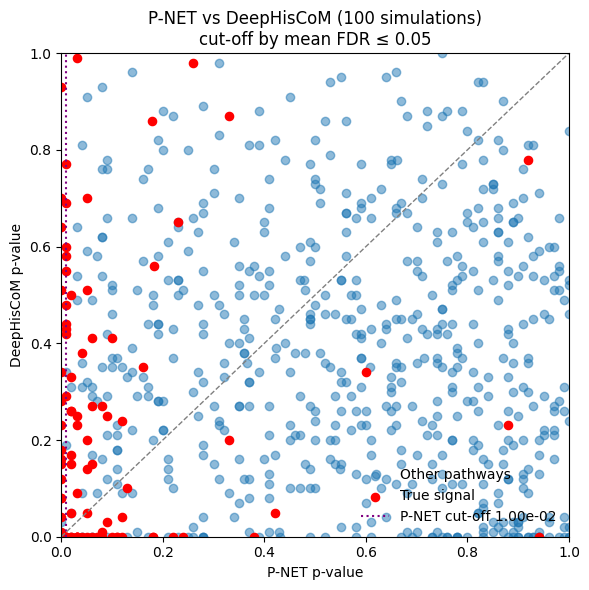

In [54]:
pnet_cut = get_cutoff_from_table(tbl_pnet,0.05)
deep_cut = get_cutoff_from_table(tbl_deep, 0.05)

print(f'P-NET  cut-off (mean FDR ≤ 0.05): {pnet_cut}')
print(f'DeepHisCoM cut-off (mean FDR ≤ 0.05): {deep_cut}')

# ───────────────────────────────────────────────
# 4. 산점도
# ───────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_all.loc[~is_true, 'pnet_p'], df_all.loc[~is_true, 'deep_p'],
           alpha=.5, label='Other pathways')
ax.scatter(df_all.loc[is_true, 'pnet_p'], df_all.loc[is_true, 'deep_p'],
           color='red', s=35, label='True signal')

if not np.isnan(pnet_cut):
    ax.axvline(pnet_cut, ls=':', color='purple',
               label=f'P-NET cut-off {pnet_cut:.2e}')
if not np.isnan(deep_cut):
    ax.axhline(deep_cut, ls=':', color='purple',
               label=f'Deep cut-off {deep_cut:.2e}')

ax.plot([0,1],[0,1], ls='--', lw=1, color='gray')
ax.set_xlim(0,1); ax.set_ylim(0,1)
ax.set_xlabel('P-NET p-value'); ax.set_ylabel('DeepHisCoM p-value')
ax.set_title('P-NET vs DeepHisCoM (100 simulations)\ncut-off by mean FDR ≤ 0.05')
ax.legend(frameon=False, loc='lower right')
plt.tight_layout(); plt.show()


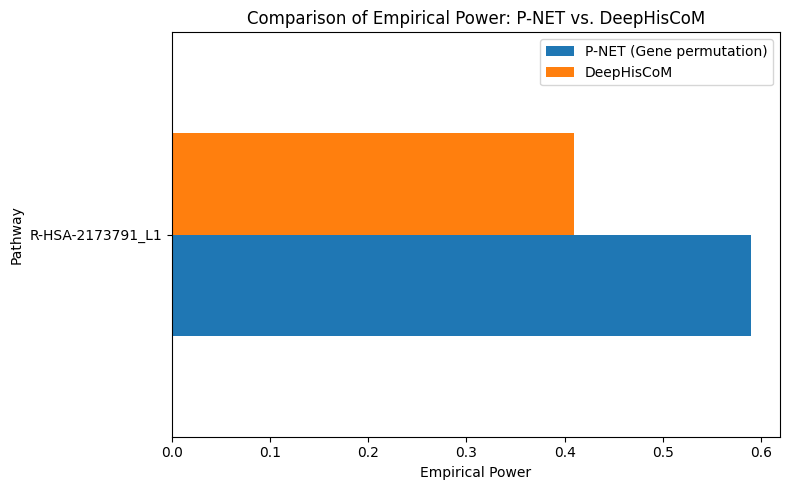

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# =============================================================================
# 1. P-NET (Gene permutation) 결과 읽기 및 empirical power 계산
# =============================================================================

start_num = 1
end_num = 100
pvalue_list_pnet = []
pvalue_dir_pnet = './results/b4_g4/gene_permutation/'

for i in range(start_num, end_num + 1):
    pvalue_file = f'{pvalue_dir_pnet}sim_{i}_pvalues.csv'
    try:
        pvalue_df = pd.read_csv(pvalue_file, index_col=0)
        pvalue_list_pnet.append(pvalue_df)
    except FileNotFoundError:
        print(f"File {pvalue_file} not found. Skipping.")

# 관심 있는 실제 경로 목록 (P-NET에서는 _L# suffix 포함)
true_pathways_pnet = ['R-HSA-2173791_L1', 'R-HSA-170834_L2', 'R-HSA-9006936_L3']

# 여러 시뮬레이션 결과 병합
pvalue_all_pnet = pd.concat(pvalue_list_pnet, axis=0)

# true_pathways에 해당하는 행만 추출하고, empirical power 계산
power_df_pnet = (
    pvalue_all_pnet
    .loc[pvalue_all_pnet.index.isin(true_pathways_pnet)]
    .groupby(level=0)
    .apply(lambda x: (x['p_value'] < 0.05).mean())
    .reset_index()
)
power_df_pnet.columns = ['pathway', 'power']
power_df_pnet = power_df_pnet.rename(columns={'power': 'P-NET (Gene permutation)'})

# =============================================================================
# 2. DeepHisCoM 결과 읽기 및 empirical power 계산
# =============================================================================

pvalue_list_deep = []
pvalue_dir_deep = './results/b4_g4/label_permutation/'

for i in range(start_num, end_num + 1):
    pvalue_file = f'{pvalue_dir_deep}sim_{i}_pvalues_DeepHisCoM.csv'
    try:
        pvalue_df = pd.read_csv(pvalue_file, index_col=0)
        pvalue_list_deep.append(pvalue_df)
    except FileNotFoundError:
        print(f"File {pvalue_file} not found. Skipping.")

# 실제 pathway 목록 (DeepHisCoM에서는 suffix 없이)
true_pathways_deep = ['R-HSA-2173791', 'R-HSA-170834', 'R-HSA-9006936']

# 여러 시뮬레이션 결과 병합
pvalue_all_deep = pd.concat(pvalue_list_deep, axis=0)

# true_pathways에 해당하는 행만 추출하고 empirical power 계산
power_df_deep = (
    pvalue_all_deep
    .loc[pvalue_all_deep.index.isin(true_pathways_deep)]
    .groupby(level=0)
    .apply(lambda x: (x['p_value'] < 0.05).mean())
    .reset_index()
)
power_df_deep.columns = ['pathway', 'power']

# =============================================================================
# 3. DeepHisCoM pathway 이름에 P-NET suffix 매핑
# =============================================================================

# P-NET에서는 레벨 정보가 포함된 형태이므로, DeepHisCoM 결과를 동일하게 매핑
suffix_map = {
    'R-HSA-2173791': 'R-HSA-2173791_L1',
    'R-HSA-170834':  'R-HSA-170834_L2',
    'R-HSA-9006936': 'R-HSA-9006936_L3'
}

# DeepHisCoM 경로 이름을 P-NET과 일치하도록 변환
power_df_deep['pathway'] = power_df_deep['pathway'].map(suffix_map)
power_df_deep = power_df_deep.rename(columns={'power': 'DeepHisCoM'})

# =============================================================================
# 4. 두 결과 병합 및 시각화
# =============================================================================

# pathway 기준으로 병합
merged_df = pd.merge(
    power_df_pnet,
    power_df_deep,
    on='pathway',
    how='inner'
)

# 병합된 DataFrame을 index 설정
merged_df.set_index('pathway', inplace=True)

# 가로 바 차트 생성
ax = merged_df.plot(kind='barh', figsize=(8, 5))
ax.set_xlabel('Empirical Power')
ax.set_ylabel('Pathway')
ax.set_title('Comparison of Empirical Power: P-NET vs. DeepHisCoM')
plt.tight_layout()
plt.show()



In [57]:
merged_df.to_csv("beta_4.csv")

File ./results/b0_g0.0/label_permutation/sim_1_pvalues_DeepHisCoM.csv not found. Skipping.
File ./results/b0_g0.0/label_permutation/sim_2_pvalues_DeepHisCoM.csv not found. Skipping.
File ./results/b0_g0.0/label_permutation/sim_71_pvalues_DeepHisCoM.csv not found. Skipping.
File ./results/b0_g0.0/label_permutation/sim_72_pvalues_DeepHisCoM.csv not found. Skipping.
File ./results/b0_g0.0/label_permutation/sim_73_pvalues_DeepHisCoM.csv not found. Skipping.
File ./results/b0_g0.0/label_permutation/sim_74_pvalues_DeepHisCoM.csv not found. Skipping.
File ./results/b0_g0.0/label_permutation/sim_75_pvalues_DeepHisCoM.csv not found. Skipping.
File ./results/b0_g0.0/label_permutation/sim_76_pvalues_DeepHisCoM.csv not found. Skipping.
File ./results/b0_g0.0/label_permutation/sim_77_pvalues_DeepHisCoM.csv not found. Skipping.
File ./results/b0_g0.0/label_permutation/sim_78_pvalues_DeepHisCoM.csv not found. Skipping.
File ./results/b0_g0.0/label_permutation/sim_79_pvalues_DeepHisCoM.csv not found. 

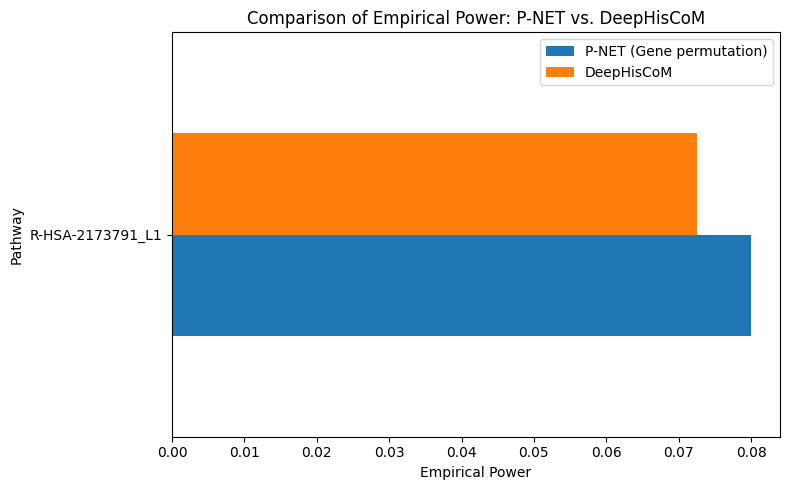

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# =============================================================================
# 1. P-NET (Gene permutation) 결과 읽기 및 empirical power 계산
# =============================================================================

start_num = 1
end_num = 100
pvalue_list_pnet = []
pvalue_dir_pnet = './results/b0_g0.0/gene_permutation/'

for i in range(start_num, end_num + 1):
    pvalue_file = f'{pvalue_dir_pnet}sim_{i}_pvalues.csv'
    try:
        pvalue_df = pd.read_csv(pvalue_file, index_col=0)
        pvalue_list_pnet.append(pvalue_df)
    except FileNotFoundError:
        print(f"File {pvalue_file} not found. Skipping.")

# 관심 있는 실제 경로 목록 (P-NET에서는 _L# suffix 포함)
true_pathways_pnet = ['R-HSA-2173791_L1', 'R-HSA-170834_L2', 'R-HSA-9006936_L3']

# 여러 시뮬레이션 결과 병합
pvalue_all_pnet = pd.concat(pvalue_list_pnet, axis=0)

# true_pathways에 해당하는 행만 추출하고, empirical power 계산
power_df_pnet = (
    pvalue_all_pnet
    .loc[pvalue_all_pnet.index.isin(true_pathways_pnet)]
    .groupby(level=0)
    .apply(lambda x: (x['p_value'] < 0.05).mean())
    .reset_index()
)
power_df_pnet.columns = ['pathway', 'power']
power_df_pnet = power_df_pnet.rename(columns={'power': 'P-NET (Gene permutation)'})

# =============================================================================
# 2. DeepHisCoM 결과 읽기 및 empirical power 계산
# =============================================================================

pvalue_list_deep = []
pvalue_dir_deep = './results/b0_g0.0/label_permutation/'

for i in range(start_num, end_num + 1):
    pvalue_file = f'{pvalue_dir_deep}sim_{i}_pvalues_DeepHisCoM.csv'
    try:
        pvalue_df = pd.read_csv(pvalue_file, index_col=0)
        pvalue_list_deep.append(pvalue_df)
    except FileNotFoundError:
        print(f"File {pvalue_file} not found. Skipping.")

# 실제 pathway 목록 (DeepHisCoM에서는 suffix 없이)
true_pathways_deep = ['R-HSA-2173791', 'R-HSA-170834', 'R-HSA-9006936']

# 여러 시뮬레이션 결과 병합
pvalue_all_deep = pd.concat(pvalue_list_deep, axis=0)

# true_pathways에 해당하는 행만 추출하고 empirical power 계산
power_df_deep = (
    pvalue_all_deep
    .loc[pvalue_all_deep.index.isin(true_pathways_deep)]
    .groupby(level=0)
    .apply(lambda x: (x['p_value'] < 0.05).mean())
    .reset_index()
)
power_df_deep.columns = ['pathway', 'power']

# =============================================================================
# 3. DeepHisCoM pathway 이름에 P-NET suffix 매핑
# =============================================================================

# P-NET에서는 레벨 정보가 포함된 형태이므로, DeepHisCoM 결과를 동일하게 매핑
suffix_map = {
    'R-HSA-2173791': 'R-HSA-2173791_L1',
    'R-HSA-170834':  'R-HSA-170834_L2',
    'R-HSA-9006936': 'R-HSA-9006936_L3'
}

# DeepHisCoM 경로 이름을 P-NET과 일치하도록 변환
power_df_deep['pathway'] = power_df_deep['pathway'].map(suffix_map)
power_df_deep = power_df_deep.rename(columns={'power': 'DeepHisCoM'})

# =============================================================================
# 4. 두 결과 병합 및 시각화
# =============================================================================

# pathway 기준으로 병합
merged_df = pd.merge(
    power_df_pnet,
    power_df_deep,
    on='pathway',
    how='inner'
)

# 병합된 DataFrame을 index 설정
merged_df.set_index('pathway', inplace=True)

# 가로 바 차트 생성
ax = merged_df.plot(kind='barh', figsize=(8, 5))
ax.set_xlabel('Empirical Power')
ax.set_ylabel('Pathway')
ax.set_title('Comparison of Empirical Power: P-NET vs. DeepHisCoM')
plt.tight_layout()
plt.show()



In [82]:
merged_df.to_csv("beta_0.csv")

In [73]:
pvalue_all_pnet[pvalue_all_pnet['p_value'] < 0.05]

,p_value
pathway,
R-HSA-170834-1,0.03
R-HSA-9006936-3,0.00
R-HSA-2173791,0.00
R-HSA-2173791,0.00
R-HSA-170834-1,0.01
...,...
R-HSA-9006936-1,0.00
R-HSA-170834-2,0.02
R-HSA-170834-3,0.00


In [83]:
beta_0 = pd.read_csv("beta_0.csv", index_col=0)
beta_4 = pd.read_csv("beta_4.csv", index_col=0)

# concat 
merged_df = pd.concat([beta_0, beta_4], axis=0)

In [85]:
merged_df.index = ['beta=0', 'beta=4']

In [86]:
merged_df

,P-NET (Gene permutation),DeepHisCoM
beta=0,0.08,0.072464
beta=4,0.59,0.410000


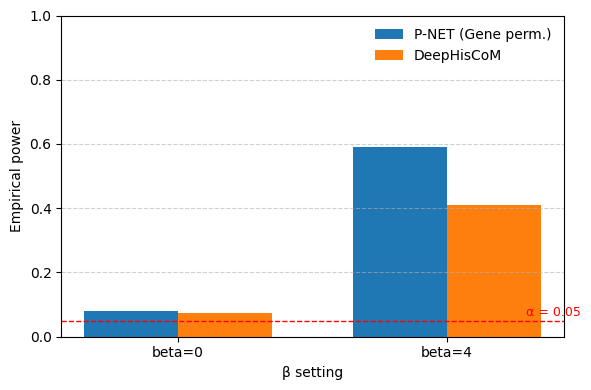

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `merged_df` is already in the environment; replace this with your own df
df = pd.DataFrame({
    "P-NET (Gene permutation)": [0.08, 0.59],
    "DeepHisCoM": [0.072464, 0.41]
}, index=["beta,gamma=0", "beta,gamma=4"])

# X-axis positions
x = np.arange(len(df.index))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(x - width/2, df["P-NET (Gene permutation)"], width, label="P-NET (Gene perm.)")
ax.bar(x + width/2, df["DeepHisCoM"],                width, label="DeepHisCoM")

# Add 0.05 reference line
ax.axhline(0.05, color="red", linestyle="--", linewidth=1)
ax.text(len(x)-0.5, 0.055, "α = 0.05", color="red", ha="right", va="bottom", fontsize=9)

# Axis/legend formatting
ax.set_xlabel("β setting")
ax.set_ylabel("Empirical power")
ax.set_xticks(x)
ax.set_xticklabels(df.index)
ax.set_ylim(0, 1)
ax.legend(frameon=False)
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()
